# (연습) 2차원 데이터 시각화

**기본 설정**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(8, 6))

붓꽃 데이터셋을 아래 방식으로 불러온다. 

In [37]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

**참고**

`sklearn`은 사이킷런 라이브러리이며 머신러닝에 가장 중요한 라이브러리 중 하나다.

`load_iris()` 함수의 반환값은 사이킷런 라이브리가 제공하는 `Bunch` 자료형이다. 

In [40]:
type(iris)

sklearn.utils._bunch.Bunch

`Bunch` 객체는 데이터셋을 사전 형식으로 담으며, 키를 객체의 속성처럼 다룰 수 있다.
사용된 키를 확인해보자.

In [41]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

이중에 붓꽃 데이터는 `'data'` 키가 가리키는 데이터프레임 객체며,
총 150개의 샘플이 각각 네 개의 특성을 갖는다.

| 특성 | 의미 |
| :--- | :--- |
| sepal length | 꽃받침 길이 |
| sepal width | 꽃받침 너비 |
| petal length | 꽃잎 길이 |
| petal width | 꽃잎 길이 |

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris.png?raw=true" style="width:700px"></div></p>

In [44]:
iris_data = iris['data']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


붓꽃의 품종 정보는 `target_names` 키가 가리킨다.

In [67]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

반면에 품종 데이터는 `'target'` 키가 가리키는 시리즈 객체다.
항목은 0, 1, 2 정수이지만, 실제로는 구분을 위한 범주형으로 특성이다.
각 숫자는 붓꽃의 품종을 가리킨다.

| 번호 | 품종 |
| :--- | :--- |
| 0 | 세토사(Iris setosa) |
| 1 | 버시컬러(Iris versicolor) |
| 2 | 버지니카(Iris verginica) |

In [45]:
iris_varieties = iris['target']
iris_varieties

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## 분류

분류는 각 샘플 데이터에 대해 하나의 레이블을 할당한다.
붓꽃의 꽃잎 길이와 너비를 특성으로 사용해서 
품종을 레이블로 사용한 결과를 그래프로 그리려고 한다.

**붓꽃 데이터 시각화**

시각화를 위해 꽃잎<font size='2'>petal</font>의 길이와 너비 두 개의 특성만 선택한다.

In [73]:
X = iris_data[["petal length (cm)", "petal width (cm)"]].values
y = iris_varieties.values

**질문 1**

150개의 데이터는 처음부터 50개씩 각각 세토사, 버시컬러, 버지키나 품종의 데이터로 구성된다.

(1) 세토사, 버시컬ㄹ, 버지니카 각각의 품종으로 구성된 데이터프레임을 가리키는 
세 개의 변수 `X_setosa`, `X_versicolor`, `X_verginica`를 선언하라.

답:

슬라이싱을 활용한다.

In [53]:
X_setosa = X[:50]
X_versicolor = X[50:100]
X_verginica = X[100:150]

50개의 샘플로 구성된다.

In [55]:
print(X_setosa.shape)
print(X_versicolor.shape)
print(X_verginica.shape)

(50, 2)
(50, 2)
(50, 2)


(2) 각 데이터셋의 산점도를 다른 색을 이용하여 그려라.

답:

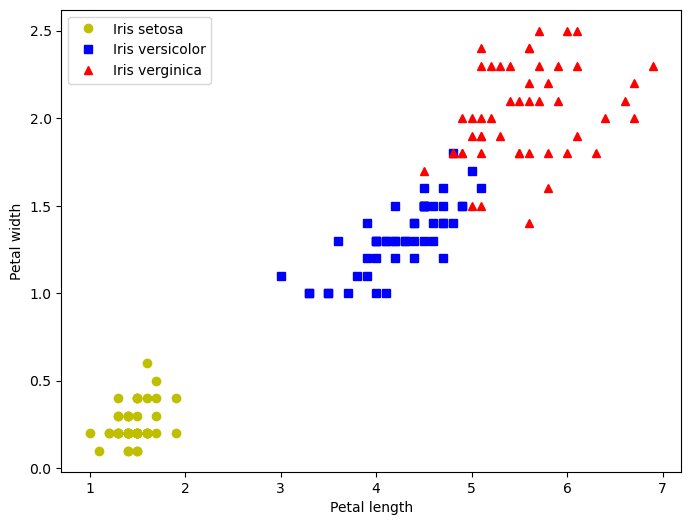

In [56]:
plt.plot(X_setosa[:, 0], X_setosa[:, 1], "yo", label="Iris setosa")             # 노랑 원
plt.plot(X_versicolor[:, 0], X_versicolor[:, 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X_verginica[:, 0], X_verginica[:, 1], "r^", label="Iris verginica")    # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.show()

(3) 범위를 x 축은 0에서 7.5 사이로, y 축은 0에서 3 사이로 지정한 다음에 
축의 척도를 일치 시킨 후에 산점도를 다시 그려라.

힌트: `plt.gca().set_aspect("equal")` 활용

답:

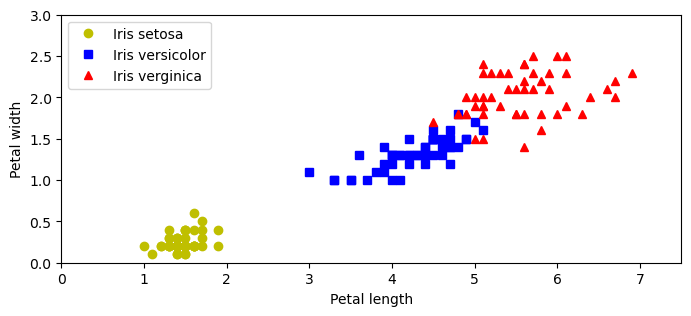

In [68]:
plt.plot(X_setosa[:, 0], X_setosa[:, 1], "yo", label="Iris setosa")             # 노랑 원
plt.plot(X_versicolor[:, 0], X_versicolor[:, 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X_verginica[:, 0], X_verginica[:, 1], "r^", label="Iris verginica")    # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")

plt.show()

(4) 아래 그림과 같은 그래프를 그려라.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris_sep.png?raw=true" style="width:700px"></div></p>

힌트: 아래 코드 활용

In [63]:
# x 좌표
x0 = np.linspace(0, 7.5, 200)

# 두 개의 직선에 대한 y 좌표값
pred_1 = 5 * x0 - 12  # 직선 1의 y 좌표
pred_2 = -x0 + 6.5    # 직선 2의 y 좌표

답:

먼저 직선을 그려본다.

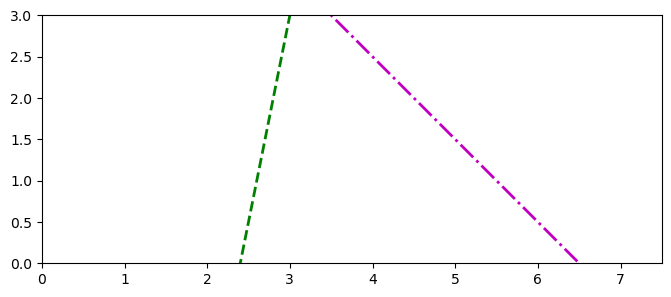

In [64]:
# x 좌표
x0 = np.linspace(0, 7.5, 200) # 0부터 7.5 사이를 200개의 작은 구간으로 균등하게 쪼갠 x 좌표값

# 두 개의 직선에 대한 y 좌표값
pred_1 = 5 * x0 - 12  # 직선 1의 y 좌표
pred_2 = -x0 + 6.5    # 직선 2의 y 좌표

plt.plot(x0, pred_1, "g--", linewidth=2) # 직선 1
plt.plot(x0, pred_2, "m-.", linewidth=2) # 직선 2

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")

plt.show()

위 두 직선과 붓꽃 데이터셋의 산포도를 합치면
품종을 구별하는 경계선을 얻는다.

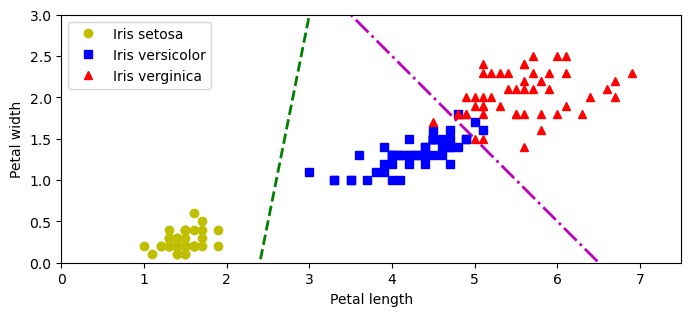

In [69]:
x0 = np.linspace(0, 7.5, 200)
pred_1 = 5 * x0 - 12
pred_2 = -x0 + 6.5
pred_3 = 0.05 * x0 + 0.6

plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-.", linewidth=2)
# plt.plot(x0, pred_3, "y-", linewidth=2)

plt.plot(X_setosa[:, 0], X_setosa[:, 1], "yo", label="Iris setosa")             # 노랑 원
plt.plot(X_versicolor[:, 0], X_versicolor[:, 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X_verginica[:, 0], X_verginica[:, 1], "r^", label="Iris verginica")    # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")

plt.show()

## 군집화

**군집**<font size='2'>cluster</font>은 유사한 대상들의 모음을 가리킨다.
예를 들어, 산이나 공원에서 볼 수 있는 이름은 모르지만 동일 품종의 꽃으로 이루어진 군집 등을
생각하면 된다.
**군집화**<font size='2'>clustering</font>는 대상들을 나누어 군집을 
형성하는 것을 말한다. 

각 샘플에 하나의 그룹을 할당한다는 점에서 분류와 유사하다.
하지만 각 샘플에 대해 레이블을 할당하는 게 아니라
유사한 샘플들의 군집으로 구분한다는 점에서 다르다.

(1) 아래 그림은 아이리스 붓꽃 데이터에 세토사 품종으로 구성된 군집과 나머지로 구성된 군집을 보여준다.
아래 그래프를 그리는 코드를 작성하라.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/iris_cluster.png?raw=true" style="width:700px"></div></p>

답:

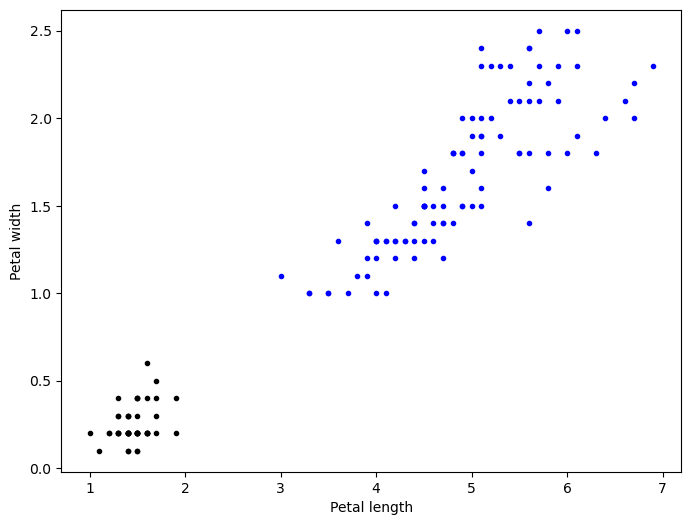

In [81]:
iris_data_arr = iris_data.values

plt.scatter(iris_data_arr[:50, 2], iris_data_arr[:50, 3], c="k", marker=".")
plt.scatter(iris_data_arr[50:, 2], iris_data_arr[50:, 3], c="b", marker=".")

plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.show()

## 서브플롯 활용

분류와 군집 그래프 여러 개를 동시에 그리기 위해 서브플롯을 활용하는
세 가지 방식을 소개한다.

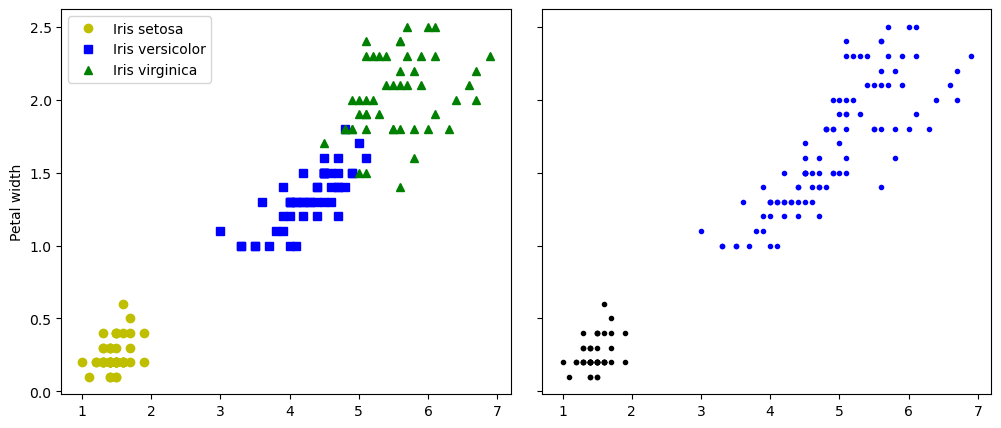

In [88]:
plt.rc('figure', figsize=(12, 5))

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

axes[0].plot(iris_data_arr[y==0, 2], iris_data_arr[y==0, 3], "yo", label="Iris setosa")
axes[0].plot(iris_data_arr[y==1, 2], iris_data_arr[y==1, 3], "bs", label="Iris versicolor")
axes[0].plot(iris_data_arr[y==2, 2], iris_data_arr[y==2, 3], "g^", label="Iris virginica")
axes[0].set_ylabel("Petal width")
axes[0].legend()

axes[1].scatter(iris_data_arr[y==0, 2], iris_data_arr[y==0, 3], c="k", marker=".")
axes[1].scatter(iris_data_arr[(y==1) | (y==2), 2], iris_data_arr[(y==1) | (y==2), 3], c="b", marker=".")

fig.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()